In [18]:
import pandas as pd

data = pd.DataFrame({'Math':[70, 60, 40, 80, 30],
                    'Chemistry':[60, 80, 65, 55, 60],
                    'Maths':[70, 60, 40, 80, 30],
                    'Physics':[50, 50, 50, 50, 50],
                    'General_Test':[70, 70, 60, 60, 80]})

print(data)

   Math  Chemistry  Maths  Physics  General_Test
0    70         60     70       50            70
1    60         80     60       50            70
2    40         65     40       50            60
3    80         55     80       50            60
4    30         60     30       50            80


## Variance Threshold 

In [19]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)
selected_features = selector.fit_transform(data)

data = pd.DataFrame(selected_features, columns=selector.get_feature_names_out())
print(data)

   Math  Chemistry  Maths  General_Test
0    70         60     70            70
1    60         80     60            70
2    40         65     40            60
3    80         55     80            60
4    30         60     30            80


## Pearson Correlation

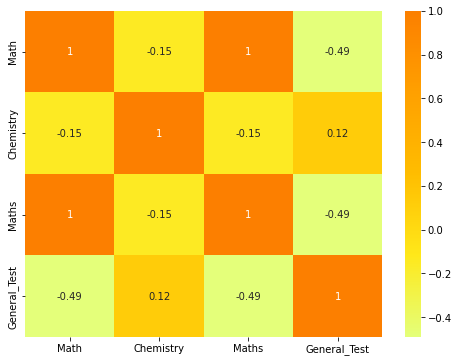

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
cor = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

In [21]:
corr_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.9:
            colname = cor.columns[i]
            corr_features.add(colname)

In [22]:
corr_features

{'Maths'}

In [23]:
data = data.drop(corr_features, axis=1)
print(data)

   Math  Chemistry  General_Test
0    70         60            70
1    60         80            70
2    40         65            60
3    80         55            60
4    30         60            80
